# A. Session 13 - SVM

![](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

SVM (Support Vector Machine) adalah sebuah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Ini adalah salah satu algoritma yang populer dan kuat dalam pembelajaran mesin yang bekerja dengan membangun hyperplane (bidang pembagian) dalam ruang berdimensi tinggi untuk memisahkan data ke dalam kelas-kelas yang berbeda. Konsep utama dalam SVM adalah sebagai berikut:

1. **Hyperplane**: Dalam konteks SVM, hyperplane adalah bidang atau dinding pemisah yang digunakan untuk memisahkan dua kelas data. Hyperplane ini memiliki dimensi satu kurang dari dimensi data itu sendiri karena harus menjadi bidang pemisah.

2. **Margin**: Margin adalah jarak antara hyperplane dan titik data terdekat dari masing-masing kelas. SVM berusaha untuk memaksimalkan margin ini karena semakin besar margin, semakin baik kemampuan model untuk menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

3. **Support Vectors**: Support vectors adalah titik-titik data yang berada pada margin, yang berarti mereka adalah titik-titik yang paling dekat dengan hyperplane. Support vectors sangat penting dalam SVM karena mereka mempengaruhi penentuan hyperplane dan model secara keseluruhan.

4. **Kernel Trick**: SVM juga memungkinkan penggunaan kernel function untuk memproyeksikan data ke ruang berdimensi lebih tinggi. Hal ini memungkinkan SVM untuk menangani masalah yang tidak dapat dipisahkan secara linier dalam dimensi asli. Kernel seperti RBF (Radial Basis Function) dan Polynomial sering digunakan dalam SVM.

5. **Regularisasi**: SVM memiliki parameter penalti yang mengontrol tingkat kompleksitas model. Dalam SVM, ini disebut dengan parameter `C`. Nilai yang lebih tinggi dari `C` menghasilkan margin yang lebih ketat dan memungkinkan beberapa titik data berada di dalam margin atau bahkan di sisi yang salah dari hyperplane, sementara nilai yang lebih rendah dari `C` menghasilkan margin yang lebih besar dan lebih banyak titik data berada di dalamnya.

6. **Klasifikasi**: Dalam tugas klasifikasi, SVM mencoba memisahkan dua kelas data dengan hyperplane. Titik-titik data yang berada di satu sisi hyperplane diklasifikasikan ke dalam satu kelas, sementara titik-titik data di sisi lain diklasifikasikan ke dalam kelas yang lain.

7. **Regresi**: Selain tugas klasifikasi, SVM juga dapat digunakan untuk regresi dengan memodifikasi formulasi matematisnya. Dalam hal ini, SVM mencoba membangun hyperplane yang mencocokkan data target secara sebaik mungkin.

![](https://miro.medium.com/v2/resize:fit:1100/1*XE9jt0r1yAW8LnliQ3mllQ.png)




## 1. Load Dataset "Data FillingA1"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Data FillingA1.xlsx' pada folder Dataset di google drive

In [5]:
import pandas as pd

# Path ke file Excel di Google Drive
file_path = '/content/drive/My Drive/Dataset/Data FillingA1.xlsx'

# Membaca file Excel menggunakan pandas
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())


          dtmInsertedDate  intAugerAcc  intSpeedDischarge  intAugerTimeError  \
0 2023-10-25 19:55:03.227        12000                300                 10   
1 2023-10-25 19:55:13.193        12000                300                 10   
2 2023-10-25 19:55:23.257        12000                300                 10   
3 2023-10-25 19:55:33.207        12000                300                 10   
4 2023-10-25 19:55:43.287        12000                300                 10   

   intCrossJawSealTime  intVerticalSealTime  decCrossJawFrontSet  \
0                  300                    0                  155   
1                  300                    0                  155   
2                  300                    0                  155   
3                  300                    0                  155   
4                  300                    0                  155   

   decCrossJawFrontActual  decCrossJawRearSet  decCrossJawRearActual  \
0                   155.6             

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dtmInsertedDate         2515 non-null   datetime64[ns]
 1   intAugerAcc             2515 non-null   int64         
 2   intSpeedDischarge       2515 non-null   int64         
 3   intAugerTimeError       2515 non-null   int64         
 4   intCrossJawSealTime     2515 non-null   int64         
 5   intVerticalSealTime     2515 non-null   int64         
 6   decCrossJawFrontSet     2515 non-null   int64         
 7   decCrossJawFrontActual  2515 non-null   float64       
 8   decCrossJawRearSet      2515 non-null   int64         
 9   decCrossJawRearActual   2515 non-null   float64       
 10  decVerticalJawSet       2515 non-null   int64         
 11  decVerticalJawActual    2515 non-null   float64       
 12  intWeight               2515 

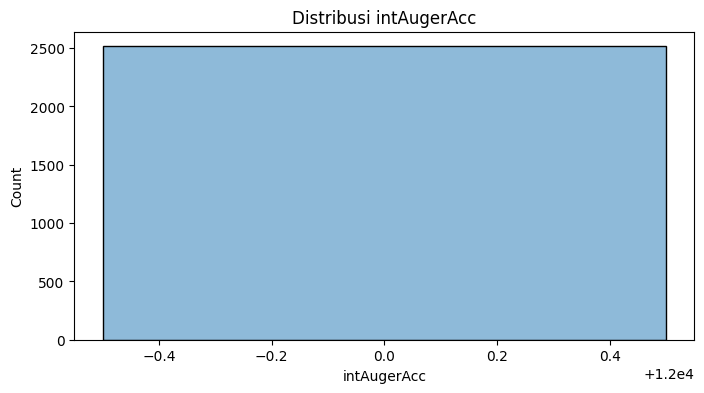

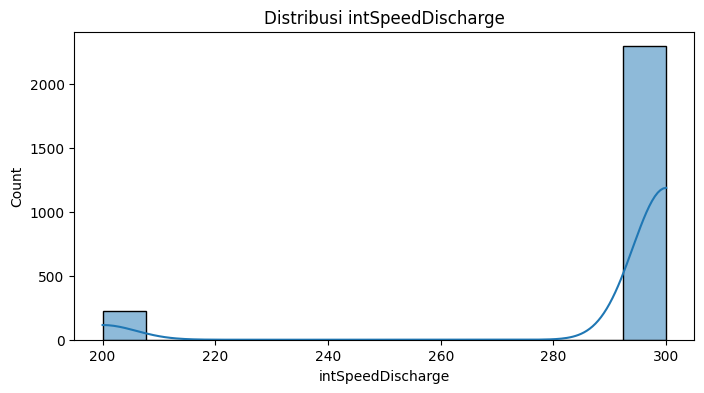

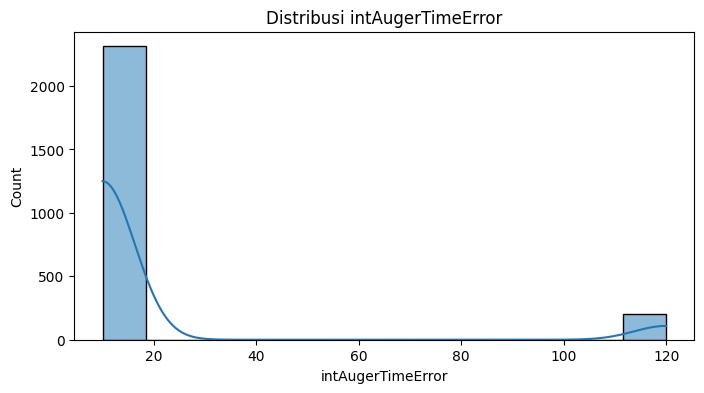

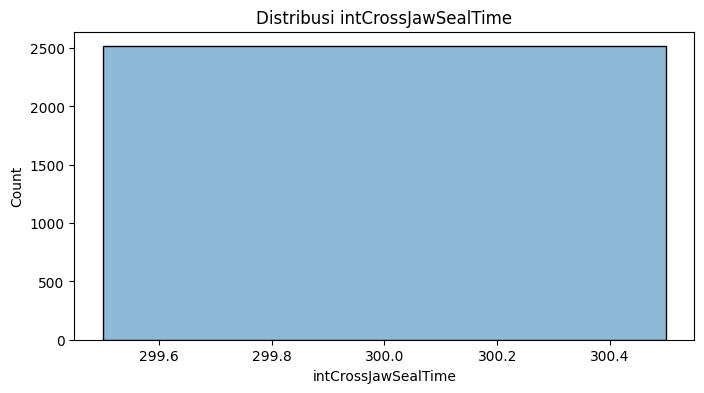

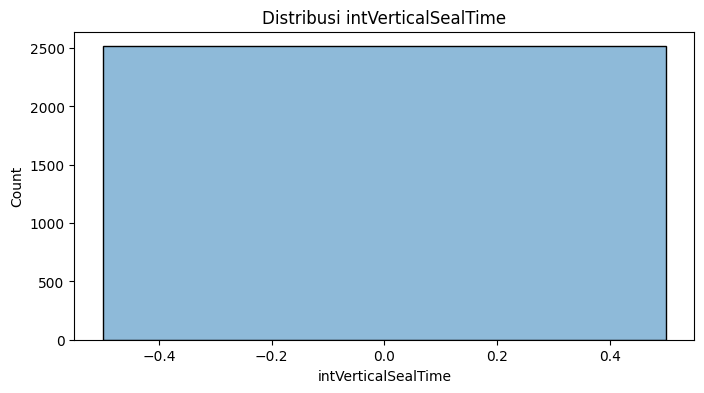

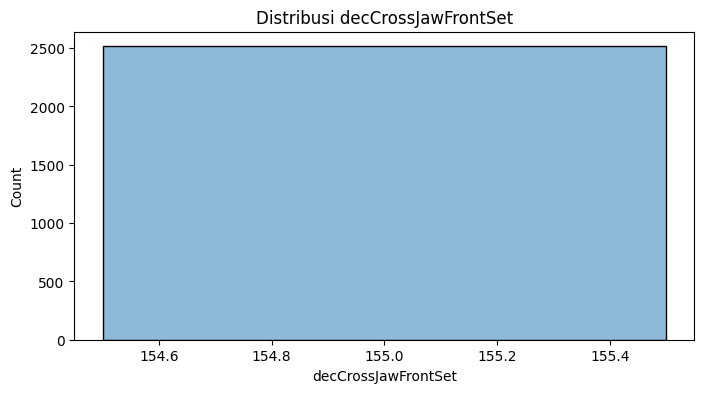

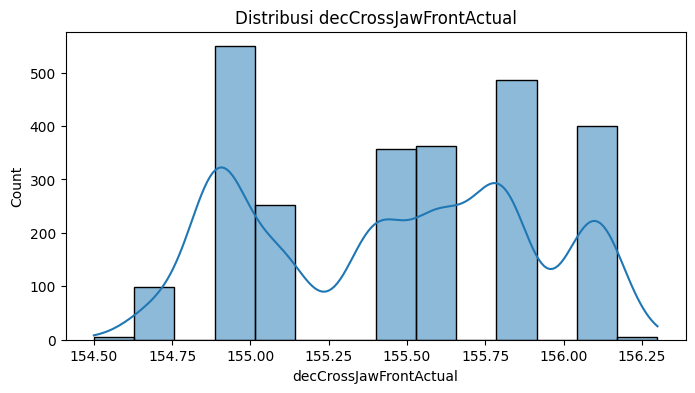

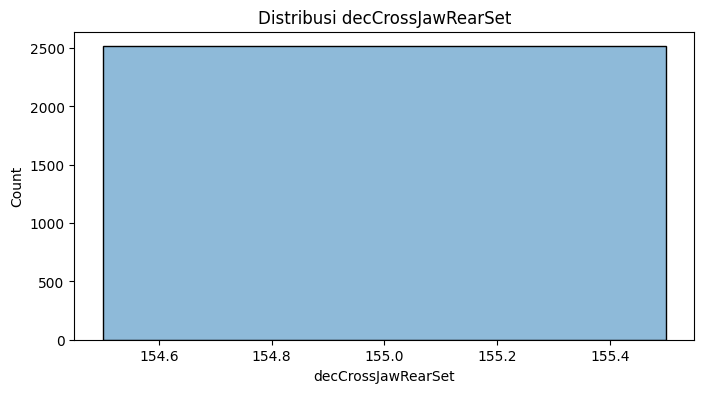

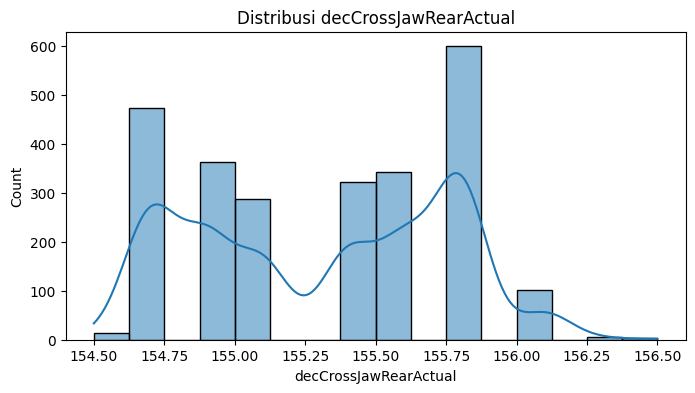

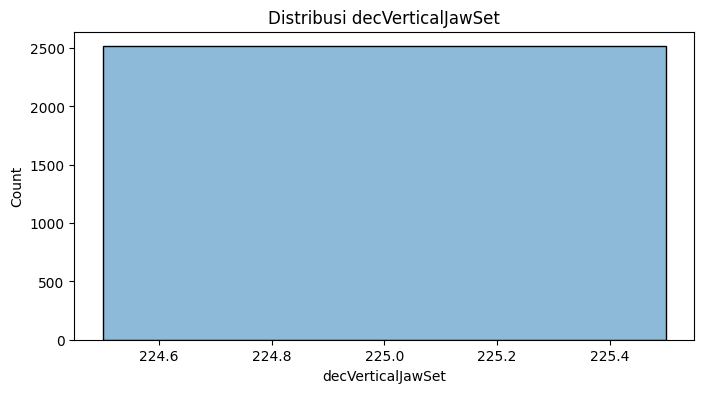

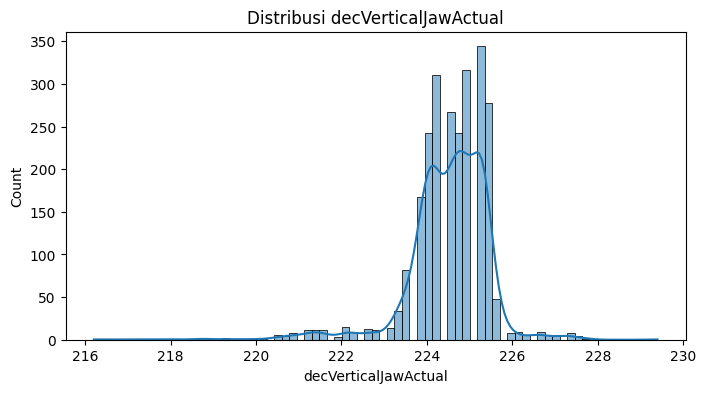

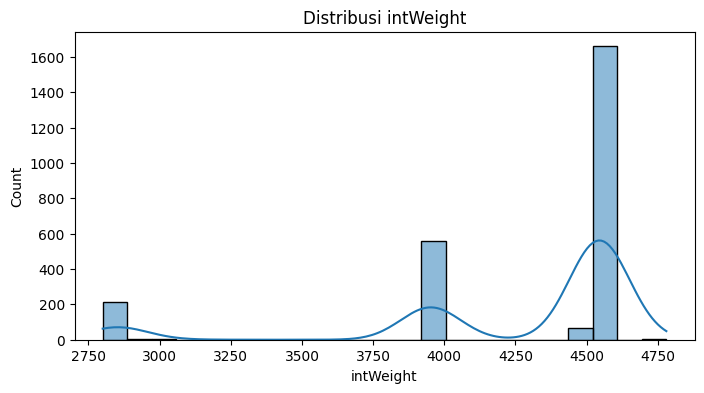

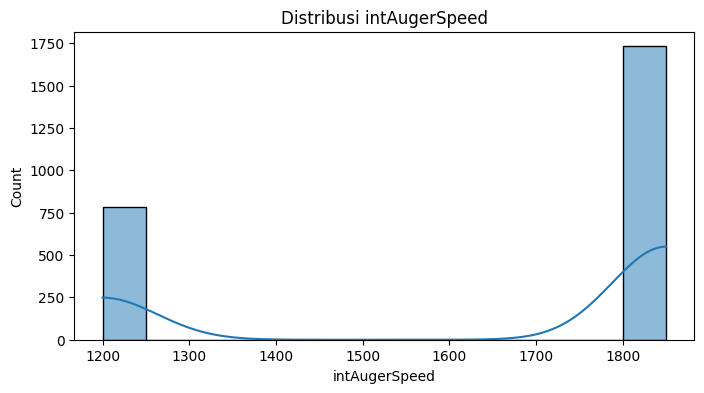

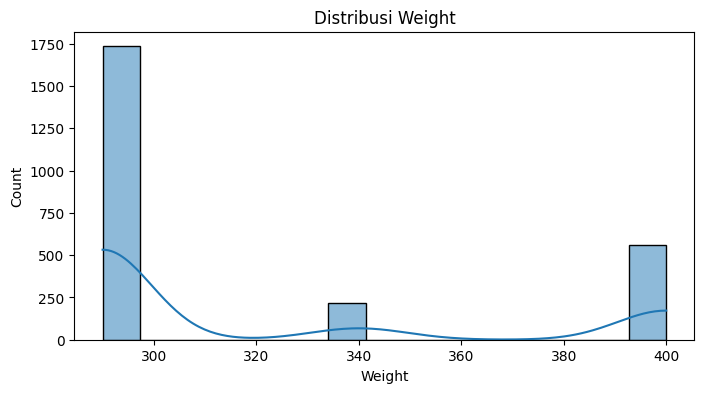

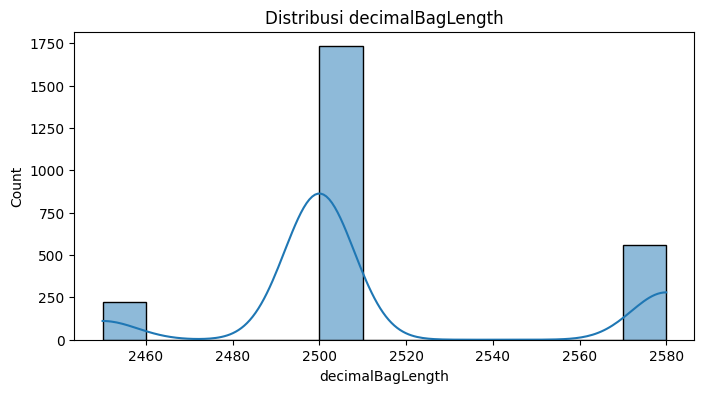

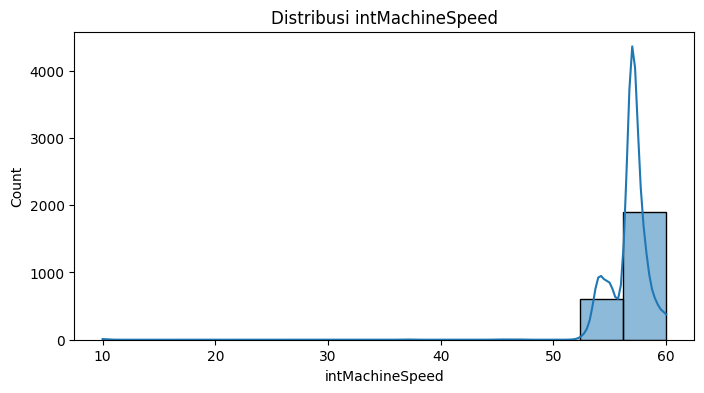

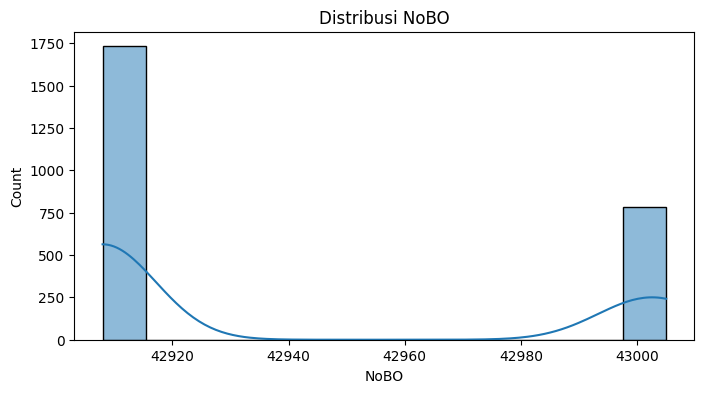

In [6]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan matplotlib
%matplotlib inline

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning.

Berdasarkan nilai korelasi yang tinggi antara beberapa pasangan fitur dalam dataset yang sudah diketahui melalui Orange, kita dapat merancang use case machine learning di bidang manufaktur. Mari kita pilih salah satu skenario yang umum dalam industri manufaktur: **Optimasi Proses Pengemasan**.

### **Use Case: Optimasi Proses Pengemasan**

**Tujuan**: Meningkatkan efisiensi dan kualitas proses pengemasan dengan mengoptimalkan kecepatan auger dan kecepatan discharge berdasarkan berat target yang diinginkan.

#### Analisis Korelasi:
1. **`Weight` dan `intAugerSpeed`** (-0.942): Korelasi negatif yang sangat tinggi ini menunjukkan bahwa saat kecepatan auger meningkat, berat cenderung menurun. Ini bisa menjadi informasi penting dalam mengontrol kualitas pengemasan.
2. **`intWeight` dan `intSpeedDischarge`** (+0.874): Hubungan positif yang kuat ini menandakan bahwa kecepatan discharge dan berat paket berhubungan erat, yang berguna untuk menyesuaikan kecepatan discharge berdasarkan berat yang diinginkan.
3. **`intAugerSpeed` dan `intWeight`** (+0.835): Hubungan positif ini bisa menunjukkan bahwa kecepatan auger mempengaruhi berat paket, walaupun tidak sekuat hubungan `Weight` dan `intAugerSpeed`.
4. **`Weight` dan `decimalBagLength`** (+0.776): Hubungan positif ini menunjukkan bahwa panjang kantong pengemasan mungkin perlu disesuaikan berdasarkan berat yang diinginkan.

#### **Pilihan Fitur dan Target:**
- **Fitur**:
  - `intAugerSpeed`: Sebagai kontrol utama dalam proses pengemasan.
  - `intSpeedDischarge`: Untuk mengoptimalkan kecepatan discharge sesuai dengan kebutuhan.
  - `decimalBagLength`: Sebagai faktor yang mempengaruhi efisiensi pengemasan.

- **Target**:
  - `Weight` atau `intWeight`: Bergantung pada kebutuhan presisi. Jika presisi tinggi dan variasi kecil dalam berat sangat penting, maka `Weight` (yang mungkin merupakan data float/desimal) adalah pilihan yang lebih baik. Jika variasi kecil dalam berat tidak terlalu kritikal, `intWeight` (data integer) mungkin cukup.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training, validasi, dan testing untuk machine learning. Atur kolom "decimalBagLength" dan "intSpeedDischarge" menjadi fitur dan kolom "Weight" menjadi target pada df. Print shape setiap dataset


Shape data pelatihan: (1816, 2)
Shape data validasi: (321, 2)
Shape data pengujian: (378, 2)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

**ChatGPT Prompt:**

Berikan code untuk melakukan training machine learning dengan menggunakan SVM pada data training, kemudian evaluasi hasil model dengan data testing menggunakan MSE, RMSE, MAE, dan R^2

Mean Squared Error (MSE): 0.010035634153726946
Root Mean Squared Error (RMSE): 0.10017801232669246
Mean Absolute Error (MAE): 0.10017794460542044
R-squared (R^2): 0.9999954441294602


## 6. Actual vs Predicted

**ChatGPT Prompt:**

Berikan code untuk menampilkan beberapa baris pertama dari DataFrame yang membandingkan nilai sebenarnya dan prediksi

      Actual   Predicted
617      290  290.100162
927      290  290.100162
942      290  290.100162
973      290  290.100162
1967     400  399.899677


# B. SESSION 12 SHP - NEURAL NETWORK

1. Struktur Neural Network:

  - Terdiri dari input layer, hidden layer, dan output layer.
  - Input layer menerima data masukan, output layer menghasilkan hasil prediksi, dan hidden layer memproses informasi di antara keduanya.
  - Setiap layer terdiri dari node atau neuron.

  ![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png)

2. Node dan Fungsi Aktivasi:

  - Node atau neuron adalah unit dasar dalam neural network.
  - Setiap node menerima input, menghitung nilai berdasarkan weight dan bias, dan mengirimkan output menggunakan fungsi aktivasi.
  - Fungsi aktivasi memperkenalkan non-linearitas ke dalam model, memungkinkan neural network untuk memahami pola yang kompleks.

Node pada neural network:
![Node, weight, bias](https://mriquestions.com/uploads/3/4/5/7/34572113/perceptron-with-neuron_1.png)


  Common activation function pada node:
  ![Activation function](https://www.researchgate.net/profile/Karen-Loaiza/publication/344331692/figure/fig8/AS:965939822616576@1607309408063/Artificial-neural-network-activation-functions-In-this-figure-the-most-common.ppm)

3. Weight dan Bias:

  - Weight dan bias adalah parameter yang disesuaikan selama proses pelatihan neural network.
  - Weight mengontrol pengaruh setiap input pada output, sedangkan bias menyesuaikan tingkat aktivasi node.

Weight dan Bias:
![Weight, Bias](https://miro.medium.com/max/512/1*sPg-0hha7o3iNPjY4n-vow.jpeg)

4. Pelatihan Neural Network:

  - Neural network belajar dari data melalui proses pelatihan.
  - Backpropagation (backward propagation of errors) adalah suatu metode pelatihan pada jaringan saraf tiruan (neural network) yang digunakan untuk mengoptimalkan bobot dan bias agar model dapat belajar dari data. Proses ini bekerja dengan meminimalkan nilai fungsi kesalahan (error) antara hasil prediksi model dan nilai yang seharusnya.

Proses backpropagation dan pembaharuan nilai weight & bias:
![Backpropagation](https://i0.wp.com/analyticsarora.com/wp-content/uploads/2021/09/Understand-The-Backpropagation-Algorithm-Interview-Question.png?resize=800%2C600&ssl=1)

5. Fungsi Loss:

  - Fungsi loss mengukur sejauh mana prediksi model dari target yang sebenarnya.
  - Selama pelatihan, model mencoba mengurangi nilai fungsi loss.

Kurva loss function pada proses training dan testing pada neural network:
![Loss function curve](https://i.stack.imgur.com/csGDX.png)

6. Optimizer:

  - Optimizer adalah algoritma yang digunakan untuk mengoptimalkan weight dan bias berdasarkan nilai loss.
  - Beberapa optimizer umum termasuk Stochastic Gradient Descent (SGD), Adam, dan RMSprop.
7. Batch Size dan Epoch:

  - Batch size adalah jumlah sampel data yang digunakan untuk menghitung gradien selama satu iterasi pelatihan.
  - Epoch adalah satu iterasi melalui seluruh dataset pelatihan.

Epoch dan batch size:
![epoch and batch size](https://miro.medium.com/v2/resize:fit:1010/1*AOiD8LEDWrWy5l_f9qgweQ@2x.jpeg)

8. Overfitting dan Regularization:

  - Overfitting terjadi ketika model terlalu mempelajari data pelatihan dan tidak dapat umum ke data baru.
  - Regularization digunakan untuk mengurangi overfitting, dengan teknik seperti dropout dan weight regularization.

Underfitting, best-fitting, overfitting:
![overfitting](https://miro.medium.com/v2/resize:fit:1396/1*lARssDbZVTvk4S-Dk1g-eA.png)

Dropout:
![dropout](https://cdn-images-1.medium.com/max/644/1*dEi_IkVB7IpkzZ-6H0Vpsg.png)


9. Validasi dan Evaluasi:

  - Data validasi digunakan untuk mengukur kinerja model selama pelatihan.
  - Metrik evaluasi seperti akurasi, presisi, recall, dan F1 score digunakan untuk menilai kinerja model pada data uji.

## Training Neural Network

**ChatGPT prompt:**

Beri kode untuk melakukan pemodelan dengan neural network

In [10]:
pip install tensorflow

Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 103224.7891 - val_loss: 5448268.5000
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 100768.7500 - val_loss: 122127496.0000
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 91927.8984 - val_loss: 1143893376.0000
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 72762.5625 - val_loss: 5778537984.0000
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 45377.6094 - val_loss: 19215198208.0000
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 19748.9941 - val_loss: 46632333312.0000
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 5303.6548 - val_loss: 82435497984.0000
Epoch 8/50
63/63 [==============================] - 0s 6ms/step - loss: 948.7609 - val_loss: 111442436096.0000
Epoch 9/50
63/63 [==============================] - 0s 5ms/step - loss: 181.4854 - val_loss: 128404332544.0000
E

**ChatGPT prompt:**

Berikan code untuk menampilkan beberapa baris pertama dari DataFrame yang membandingkan nilai sebenarnya dan prediksi

   Actual  Predicted_NN
0     290    289.951233
1     290    289.951233
2     290    289.951233
3     290    289.951233
4     400    399.960754


**ChatGPT Prompt:**

Beri kode untuk memasukkan input nilai baru dan meminta model untuk melakukan prediksi

1/1 [==============================] - 0s 52ms/step
Predicted Output: 379004.9
